In [2]:
!pip install pgmpy
from pgmpy.utils import get_example_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.4 MB/s eta 0:00:0000:0100:01


4.1

In [14]:
from pgmpy.inference import VariableElimination
import timeit
import matplotlib.pyplot as plt
import math

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------------------+------------------+
| JohnCalls        |   phi(JohnCalls) |
+==================+==================+
| JohnCalls(True)  |           0.0637 |
+------------------+------------------+
| JohnCalls(False) |           0.9363 |
+------------------+------------------+


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+----------+----------+
| T        |   phi(T) |
+==========+==========+
| T(car)   |   0.5618 |
+----------+----------+
| T(train) |   0.2809 |
+----------+----------+
| T(other) |   0.1573 |
+----------+----------+


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.4360 |
+-----------+-------------+
| dysp(no)  |      0.5640 |
+-----------+-------------+


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------+------------+
| Akt       |   phi(Akt) |
+===========+============+
| Akt(LOW)  |     0.6094 |
+-----------+------------+
| Akt(AVG)  |     0.3104 |
+-----------+------------+
| Akt(HIGH) |     0.0802 |
+-----------+------------+


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+-------------------+--------------------+
| LowerBodyO2       |   phi(LowerBodyO2) |
+===================+====================+
| LowerBodyO2(<5)   |             0.3714 |
+-------------------+--------------------+
| LowerBodyO2(5-12) |             0.4887 |
+-------------------+--------------------+
| LowerBodyO2(12+)  |             0.1399 |
+-------------------+--------------------+


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

+-----------------------+-----------------+
| PropCost              |   phi(PropCost) |
+=======================+=================+
| PropCost(Thousand)    |          0.5629 |
+-----------------------+-----------------+
| PropCost(TenThou)     |          0.3152 |
+-----------------------+-----------------+
| PropCost(HundredThou) |          0.1051 |
+-----------------------+-----------------+
| PropCost(Million)     |          0.0168 |
+-----------------------+-----------------+


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

+------------+-----------+
| BP         |   phi(BP) |
+============+===========+
| BP(LOW)    |    0.3900 |
+------------+-----------+
| BP(NORMAL) |    0.2047 |
+------------+-----------+
| BP(HIGH)   |    0.4053 |
+------------+-----------+


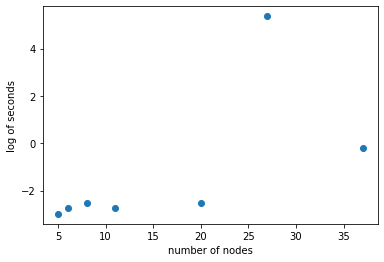

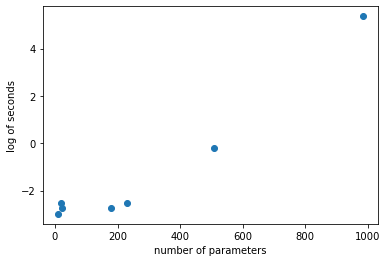

In [65]:
q_list = [('earthquake','JohnCalls'),('survey','T'),('asia','dysp'),('sachs','Akt'), ('child','LowerBodyO2'),('insurance','PropCost'),('alarm','BP')]
para_num = [10, 21, 18, 178, 230, 984, 509]
time_list = []
node_list = []
for i in range(len(q_list)):
    model = get_example_model(q_list[i][0])
    infer = VariableElimination(model)
    before = timeit.default_timer()
    q = infer.query(variables=[q_list[i][1]])
    after = timeit.default_timer()
    print(q)
    time = after - before
    time_list.append(math.log(time))
    node_num = len(model.nodes())
    node_list.append(node_num)
#plot 1
plt.scatter(node_list, time_list)
plt.xlabel("number of nodes")
plt.ylabel("log of seconds")
plt.show()
#plot 2
plt.scatter(para_num, time_list)
plt.xlabel("number of parameters")
plt.ylabel("log of seconds")
plt.show()
    

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------------------+------------------+
| JohnCalls        |   phi(JohnCalls) |
+==================+==================+
| JohnCalls(True)  |           0.0637 |
+------------------+------------------+
| JohnCalls(False) |           0.9363 |
+------------------+------------------+


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+----------+----------+
| T        |   phi(T) |
+==========+==========+
| T(car)   |   0.5618 |
+----------+----------+
| T(train) |   0.2809 |
+----------+----------+
| T(other) |   0.1573 |
+----------+----------+


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.4360 |
+-----------+-------------+
| dysp(no)  |      0.5640 |
+-----------+-------------+


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------+------------+
| Akt       |   phi(Akt) |
+===========+============+
| Akt(LOW)  |     0.6094 |
+-----------+------------+
| Akt(AVG)  |     0.3104 |
+-----------+------------+
| Akt(HIGH) |     0.0802 |
+-----------+------------+


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+-------------------+--------------------+
| LowerBodyO2       |   phi(LowerBodyO2) |
+===================+====================+
| LowerBodyO2(<5)   |             0.3714 |
+-------------------+--------------------+
| LowerBodyO2(5-12) |             0.4887 |
+-------------------+--------------------+
| LowerBodyO2(12+)  |             0.1399 |
+-------------------+--------------------+


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

+-----------------------+-----------------+
| PropCost              |   phi(PropCost) |
+=======================+=================+
| PropCost(Thousand)    |          0.5629 |
+-----------------------+-----------------+
| PropCost(TenThou)     |          0.3152 |
+-----------------------+-----------------+
| PropCost(HundredThou) |          0.1051 |
+-----------------------+-----------------+
| PropCost(Million)     |          0.0168 |
+-----------------------+-----------------+


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

+------------+-----------+
| BP         |   phi(BP) |
+============+===========+
| BP(LOW)    |    0.3900 |
+------------+-----------+
| BP(NORMAL) |    0.2047 |
+------------+-----------+
| BP(HIGH)   |    0.4053 |
+------------+-----------+


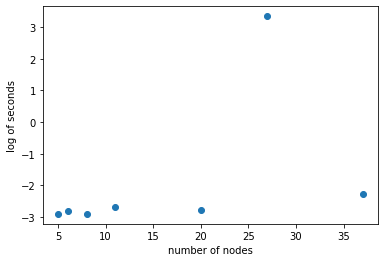

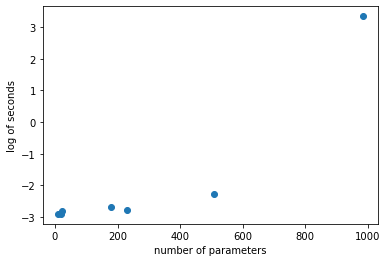

In [26]:
time_list = []
node_list = []
for i in range(len(q_list)):
    model = get_example_model(q_list[i][0])
    infer = VariableElimination(model)
    before = timeit.default_timer()
    q = infer.query(variables=[q_list[i][1]], elimination_order='MinNeighbors')
    after = timeit.default_timer()
    print(q)
    time = after - before
    time_list.append(math.log(time))
    node_num = len(model.nodes())
    node_list.append(node_num)
    
#plot 1
plt.scatter(node_list, time_list)
plt.xlabel("number of nodes")
plt.ylabel("log of seconds")
plt.show()
#plot 2
plt.scatter(para_num, time_list)
plt.xlabel("number of parameters")
plt.ylabel("log of seconds")
plt.show()
    

4.2

(a)

In [72]:
insurance_model = get_example_model('insurance')
insurance_infer = VariableElimination(insurance_model)
q = insurance_infer.query(variables=['PropCost'])
print(q)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

+-----------------------+-----------------+
| PropCost              |   phi(PropCost) |
+=======================+=================+
| PropCost(Thousand)    |          0.5629 |
+-----------------------+-----------------+
| PropCost(TenThou)     |          0.3152 |
+-----------------------+-----------------+
| PropCost(HundredThou) |          0.1051 |
+-----------------------+-----------------+
| PropCost(Million)     |          0.0168 |
+-----------------------+-----------------+


In [74]:
prob = q.values
print(prob)
prob = numpy.array([prob[2], prob[3],prob[1],prob[0]])
print(prob)

[0.56294559 0.31518759 0.10507029 0.01679652]
4
[0.10507029 0.01679652 0.31518759 0.56294559]


In [67]:
approx_infer = ApproxInference(insurance_model)
new_q = approx_infer.query(variables=["PropCost"], n_samples=100)
print(new_q)

  0%|          | 0/27 [00:00<?, ?it/s]

+-----------------------+-----------------+
| PropCost              |   phi(PropCost) |
+=======================+=================+
| PropCost(HundredThou) |          0.1000 |
+-----------------------+-----------------+
| PropCost(Million)     |          0.0300 |
+-----------------------+-----------------+
| PropCost(TenThou)     |          0.2600 |
+-----------------------+-----------------+
| PropCost(Thousand)    |          0.6100 |
+-----------------------+-----------------+


In [115]:
from pgmpy.inference import ApproxInference
import numpy
approx_time = []
sample_list = []
error_list = []
for sample in range(100, 10001, 100):
    approx_infer = ApproxInference(insurance_model)
    before = timeit.default_timer()
    new_q = approx_infer.query(variables=["PropCost"], n_samples=sample)
    after = timeit.default_timer()
    time = after - before
    approx_time.append(time)
    sample_list.append(sample)
    new_prob = new_q.values
    #new_prob = numpy.array([temp[3], temp[2], temp[0], temp[1]])
    error = numpy.linalg.norm(new_prob-prob)
    error_list.append(error)

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

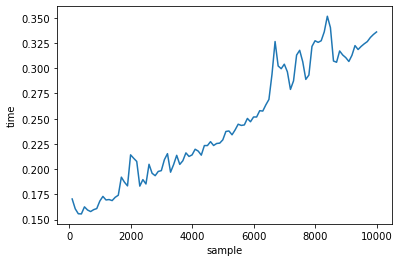

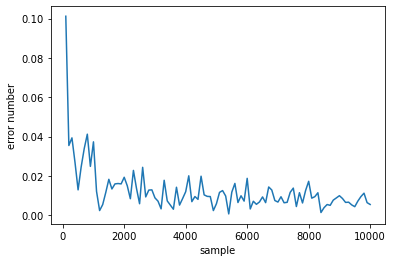

In [116]:
#plot 1
plt.plot(sample_list, approx_time)
plt.xlabel("sample")
plt.ylabel("time")
plt.show()
#plot 2
plt.plot (sample_list, error_list)
plt.xlabel("sample")
plt.ylabel("error number")
plt.show()

(c)

In [80]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State

In [87]:
baysian_infer = BayesianModelSampling(insurance_model)
evidence = [State('Age','Adult'), State('DrivHist','Zero'), State('VehicleYear','Current'), State('ThisCarDam','None'), State('MakeModel','Luxury'), State('HomeBase','City'), State('Cushioning','Good'), State('Airbag','True'), State('AntiTheft','True')]

rejection sampling

In [88]:
rej_time = []
for i in range(1,10):
    before = timeit.default_timer()
    rej_q = baysian_infer.rejection_sample(evidence=evidence[:i], size=100)
    after = timeit.default_timer()
    rej_time.append(after - before)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'rejection time')

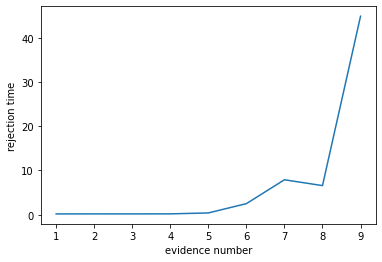

In [89]:
plt.plot(range(1, 10), rej_time)
plt.xlabel('evidence number')
plt.ylabel('rejection time')

likelihood weighting

In [113]:
likelihood_time = []
weight = []
for i in range(1,10):
    before = timeit.default_timer()
    likelihood_q = baysian_infer.likelihood_weighted_sample(evidence=evidence[:i], size=100)
    after = timeit.default_timer()
    likelihood_time.append(after - before)
    weight.append(likelihood_q._weight.mean())

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Text(0, 0.5, 'likelihood time')

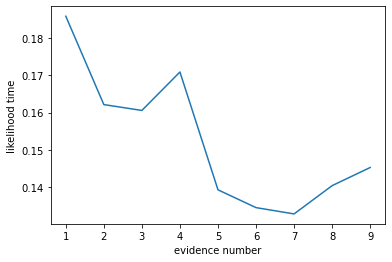

In [114]:
plt.plot(range(1, 10), likelihood_time)
plt.xlabel('evidence number')
plt.ylabel('likelihood time')

Text(0, 0.5, 'average sample weight')

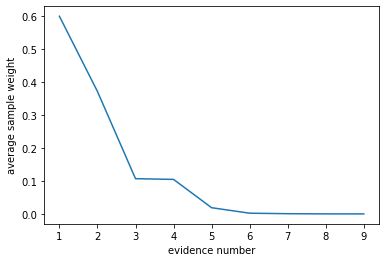

In [94]:
plt.plot(range(1, 10), weight)
plt.xlabel('evidence number')
plt.ylabel('average sample weight')

4.3

In [106]:
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import ExpectationMaximization as EM

In [101]:
partial = pd.read_csv("data/partial_data.csv")
full = pd.read_csv("data/full_data.csv")

In [105]:
model = BayesianNetwork([("tampering","alarm"),("alarm","leaving"),("leaving","report"),("fire", "alarm"),("fire","smoke")])
maximum_likelihood = MaximumLikelihoodEstimator(model=model, data=full)
for node in model.nodes():
    print(maximum_likelihood.estimate_cpd(node=node))

+--------------+-------+
| tampering(0) | 0.986 |
+--------------+-------+
| tampering(1) | 0.014 |
+--------------+-------+
+-----------+--------------+--------------+--------------+--------------+
| fire      | fire(0)      | fire(0)      | fire(1)      | fire(1)      |
+-----------+--------------+--------------+--------------+--------------+
| tampering | tampering(0) | tampering(1) | tampering(0) | tampering(1) |
+-----------+--------------+--------------+--------------+--------------+
| alarm(0)  | 1.0          | 0.0          | 0.0          | 0.5          |
+-----------+--------------+--------------+--------------+--------------+
| alarm(1)  | 0.0          | 1.0          | 1.0          | 0.5          |
+-----------+--------------+--------------+--------------+--------------+
+------------+----------+----------+
| alarm      | alarm(0) | alarm(1) |
+------------+----------+----------+
| leaving(0) | 1.0      | 0.16     |
+------------+----------+----------+
| leaving(1) | 0.0      

In [112]:
model_latent = BayesianNetwork(ebunch=model.edges(), latents=["fire", "tampering"])
model_latent.fit(partial, estimator=EM)
for cpd in model_latent.get_cpds():
    print(cpd)

  0%|          | 0/100 [00:00<?, ?it/s]

+--------------+-----------+
| tampering(0) | 0.97866   |
+--------------+-----------+
| tampering(1) | 0.0213405 |
+--------------+-----------+
+-----------+--------------------+-----+--------------------+
| tampering | tampering(0)       | ... | tampering(1)       |
+-----------+--------------------+-----+--------------------+
| fire      | fire(0)            | ... | fire(1)            |
+-----------+--------------------+-----+--------------------+
| alarm(0)  | 0.5408455932315135 | ... | 0.4819030004765702 |
+-----------+--------------------+-----+--------------------+
| alarm(1)  | 0.4591544067684865 | ... | 0.5180969995234299 |
+-----------+--------------------+-----+--------------------+
+------------+---------------------+---------------------+
| alarm      | alarm(0)            | alarm(1)            |
+------------+---------------------+---------------------+
| leaving(0) | 0.23222201262283781 | 0.5093696708111144  |
+------------+---------------------+---------------------+
| 